In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Load trained model
model = tf.keras.models.load_model("skin_cancer_classifier_mobilenet.h5")

# Label mapping (same order as training)
class_labels = [
    "Melanocytic Nevus",
    "Melanoma",
    "Benign Keratosis-like lesions",
    "Basal Cell Carcinoma",
    "Actinic Keratoses",
    "Vascular lesions",
    "Dermatofibroma"
]


2025-11-23 22:25:36.975450: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-23 22:25:37.505772: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-23 22:25:39.542858: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-23 22:25:41.910623: E external/local_xla/xla/stream_executor/cuda/cuda_p

In [2]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(100,125))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # normalize
    img_array = np.expand_dims(img_array, axis=0)  
    return img_array


In [3]:
def predict_lesion(img_path):
    processed_img = preprocess_image(img_path)
    prediction = model.predict(processed_img)

    # Get predicted class index and confidence
    class_index = np.argmax(prediction)
    confidence = round(np.max(prediction) * 100, 2)

    print(f"Predicted Class: {class_labels[class_index]}")
    print(f"Confidence: {confidence}%")

    return class_labels[class_index], confidence


In [4]:
predict_lesion("sample_skin_lesion.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step
Predicted Class: Actinic Keratoses
Confidence: 99.97%


('Actinic Keratoses', 99.97)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Class: Actinic Keratoses
Confidence: 99.97%


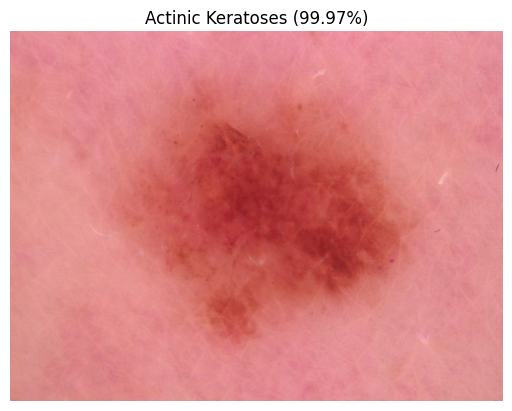

In [5]:
import matplotlib.pyplot as plt

def predict_and_show(img_path):
    pred_class, confidence = predict_lesion(img_path)

    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(f"{pred_class} ({confidence}%)")
    plt.axis("off")
    plt.show()

predict_and_show("sample_skin_lesion.jpg")
